In [1]:
# Does it actually matter if we run SNe Ia at higher res?


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

import rubin_sim.maf as maf
from rubin_sim.data import get_baseline

import rubin_sim.maf.metrics as metrics
import rubin_sim.maf.slicers as slicers


In [3]:
baseline_file = 'baseline_v3.4_10yrs.db'
name = os.path.basename(baseline_file).replace('.db','')
out_dir = 'temp'
results_db = maf.db.ResultsDb(out_dir=out_dir)


In [4]:
bundle_list = []

sne_nside = 16
sn_summary = [
    metrics.MedianMetric(),
    metrics.MeanMetric(),
    metrics.SumMetric(metric_name="Total detected"),
    metrics.CountMetric(metric_name="Total on sky", mask_val=0),
]
snslicer = slicers.HealpixSlicer(nside=sne_nside, use_cache=False)
metric = metrics.SNNSNMetric(
    n_bef=3,
    n_aft=8,
    coadd_night=True,
    add_dust=False,
    hard_dust_cut=0.25,
    zmin=0.2,
    zmax=0.5,
    z_step=0.03,
    daymax_step=3.0,
    zlim_coeff=0.95,
    gamma_name="gamma_WFD.hdf5",
    verbose=False,
)
plotDict = {"percentile_clip": 95, "n_ticks": 5}
# Run without DDF observations
bundle = maf.MetricBundle(
    metric,
    snslicer,
    "note not like '%DD%'",
    plot_dict=plotDict,
    info_label="DDF excluded",
    summary_metrics=sn_summary,
)

bundle_list.append(bundle)

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 g 20774 799 26


/Users/yoachim/anaconda3/envs/rubin/lib/python3.11/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 i 78302 799 98
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 r 50337 799 63
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 y 63121 799 79
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 z 73508 799 92
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 g 20774 799 26


/Users/yoachim/anaconda3/envs/rubin/lib/python3.11/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 i 78302 799 98
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 r 50337 799 63
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 y 78302 799 98
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 z 88689 799 111


In [5]:
sne_nside = 64
sn_summary = [
    metrics.MedianMetric(),
    metrics.MeanMetric(),
    metrics.SumMetric(metric_name="Total detected"),
    metrics.CountMetric(metric_name="Total on sky", mask_val=0),
]
snslicer = slicers.HealpixSlicer(nside=sne_nside, use_cache=False)
metric = metrics.SNNSNMetric(
    n_bef=3,
    n_aft=8,
    coadd_night=True,
    add_dust=False,
    hard_dust_cut=0.25,
    zmin=0.2,
    zmax=0.5,
    z_step=0.03,
    daymax_step=3.0,
    zlim_coeff=0.95,
    gamma_name="gamma_WFD.hdf5",
    verbose=False,
    metric_name='sne_highnside',
)
plotDict = {"percentile_clip": 95, "n_ticks": 5}
# Run without DDF observations
bundle = maf.MetricBundle(
    metric,
    snslicer,
    "note not like '%DD%'",
    plot_dict=plotDict,
    info_label="DDF excluded",
    summary_metrics=sn_summary,
)

bundle_list.append(bundle)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/maps/dust_map.py:46: UserWarning: Slicer value of nside 16 different from map value 128, using slicer value
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/maps/dust_map.py:46: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/plots/plot_handler.py:665: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn("Cannot plot object metric values with this plotter.")


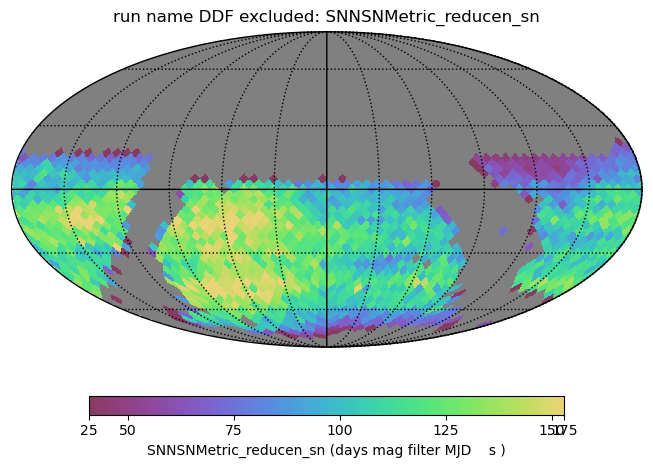

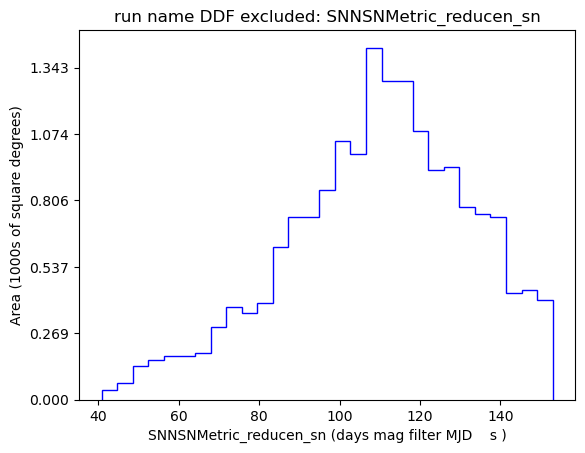

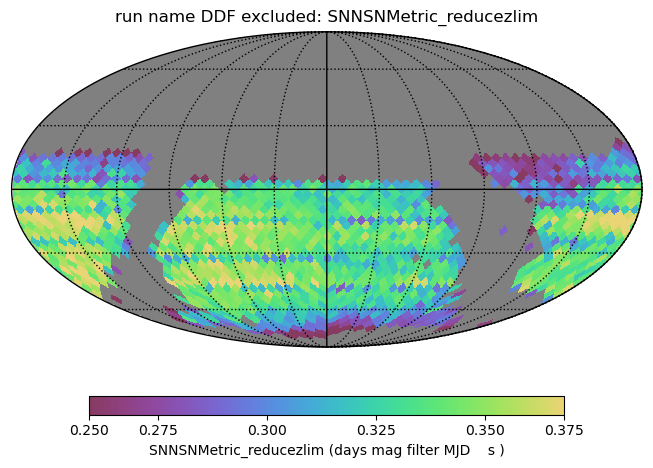

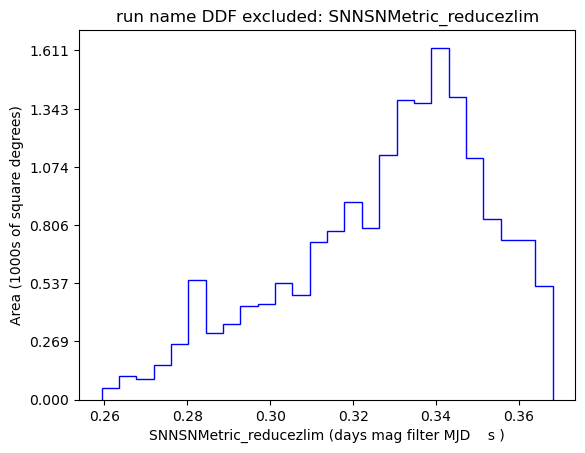

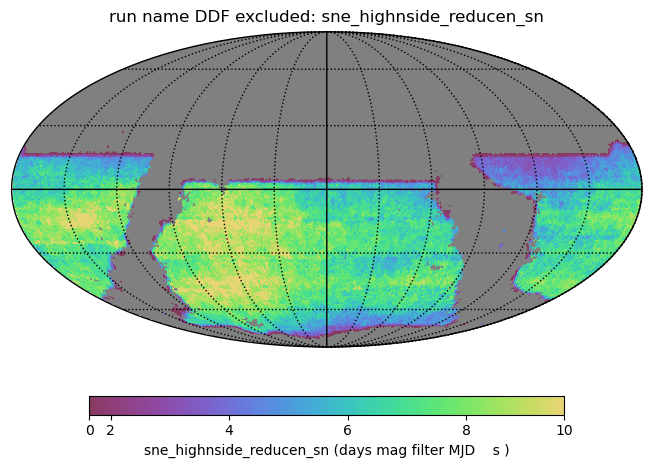

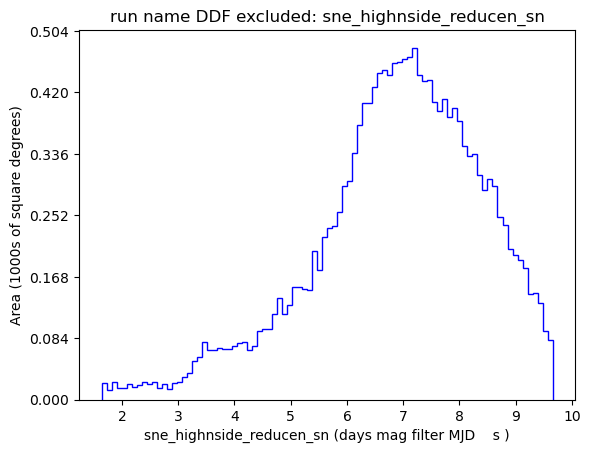

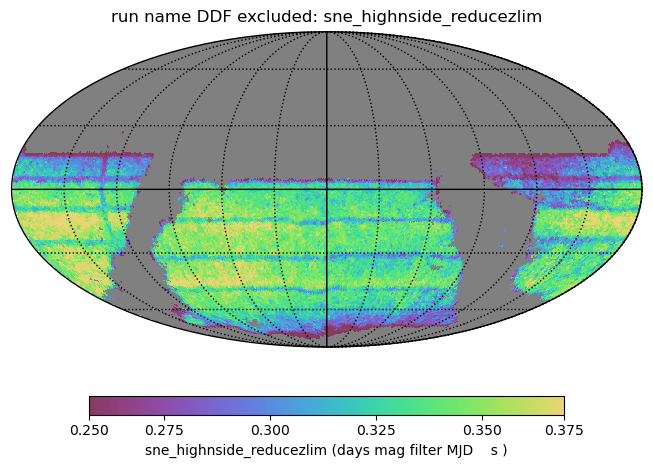

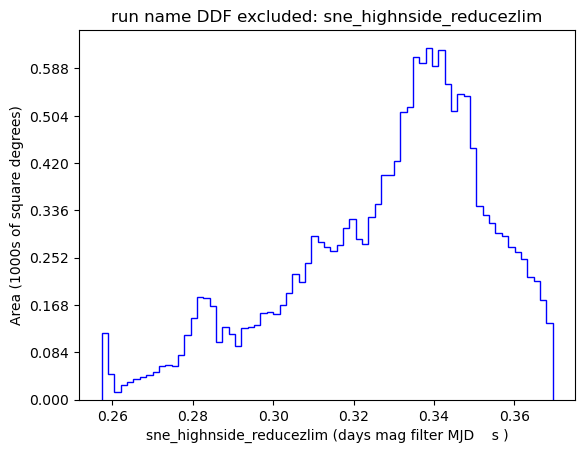

In [6]:
bd = maf.metricBundles.make_bundles_dict_from_list(bundle_list)
bg = maf.metricBundles.MetricBundleGroup(bd, baseline_file, out_dir=out_dir, results_db=results_db)
bg.run_all()
bg.plot_all(closefigs=False)


In [7]:
bd

{'run_name_SNNSNMetric_DDF_excluded_HEAL': <rubin_sim.maf.metric_bundles.metric_bundle.MetricBundle at 0x139dcf9d0>,
 'run_name_sne_highnside_DDF_excluded_HEAL': <rubin_sim.maf.metric_bundles.metric_bundle.MetricBundle at 0x13b672050>,
 'SNNSNMetric_reducen_sn': <rubin_sim.maf.metric_bundles.metric_bundle.MetricBundle at 0x13e22bf90>,
 'SNNSNMetric_reducezlim': <rubin_sim.maf.metric_bundles.metric_bundle.MetricBundle at 0x353859cd0>,
 'sne_highnside_reducen_sn': <rubin_sim.maf.metric_bundles.metric_bundle.MetricBundle at 0x13e107910>,
 'sne_highnside_reducezlim': <rubin_sim.maf.metric_bundles.metric_bundle.MetricBundle at 0x13e5e4a50>}

In [8]:
bd['SNNSNMetric_reducen_sn'].summary_values, bd['SNNSNMetric_reducezlim'].summary_values

({'Median': 111.05381249999999,
  'Mean': 108.08186016666666,
  'Total detected': 151098.44051299998,
  'Total on sky': 3072},
 {'Median': 0.3330475,
  'Mean': 0.32753556688125895,
  'Total detected': 457.8947225,
  'Total on sky': 3072})

In [9]:
bd['sne_highnside_reducen_sn'].summary_values, bd['sne_highnside_reducezlim'].summary_values

({'Median': 7.0172039999999996,
  'Mean': 6.792222600842198,
  'Total detected': 153232.541875,
  'Total on sky': 49152},
 {'Median': 0.33396525,
  'Mean': 0.3278435151817376,
  'Total detected': 7396.149702500001,
  'Total on sky': 49152})